# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Agrupamento usando o método $k$-médias</center>

Neste exercício, você implementará o método $k$-médias e verá como ele agrupa os dados. 

Antes de começar, é recomendável que você revise os conceitos apresentados em aula.

## Instruções
Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* <tt>findClosestCentroids()</tt>
* <tt>calculateCentroids()</tt>

## Parte 1: Encontrando os centróides mais próximos

Nessa etapa, deverá ser criada uma função para encontrar os centróides mais próximos.

Primeiro, vamos carregar os dados do arquivo.

In [14]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes e análise de dados

# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data.csv', sep=',') 

Vamos dar uma olhada nas 6 primeiras amostras da base de dados.

In [15]:
# vamos usar a função display para imprimir o dataframe. 
# Também poderíamos ter usado a função print: print(df_dataset.head(n=6))
display(df_dataset.head(n=6))

,f1,f2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
5,1.247923,4.932678


Conforme você pode observar, a base de dados que acabamos de carregar não possui rótulos. Por isso, nós utilizaremos o $k$-médias, um método de aprendizado não supervisionado, para tentar encontrar agrupamentos nos dados.

Vamos guardar os dados dentro de uma matriz. Depois, vamos exibir as 5 primeiras linhas da matriz de dados.

In [16]:
# pega os valores do dataframe
X = df_dataset.values 

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

X: [[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]]


Vamos criar uma função para plotar os dados.

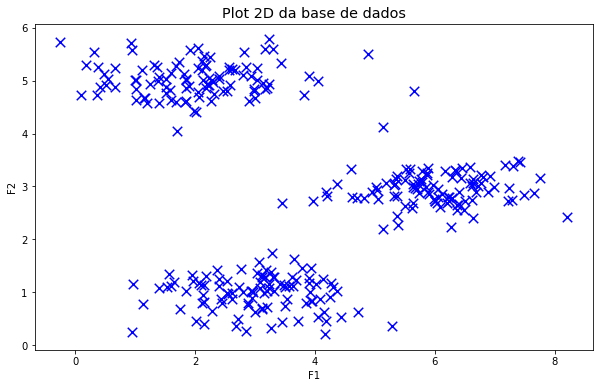

In [17]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    
    PLOTARDADOS(X,Y) plota os dados e seta os rotulos x e y da
    figura.
    """
    
    # definindo o tamanho da figura 
    plt.figure(figsize=(10,6))
    
    # plota os dados
    plt.scatter( X, Y, marker='x', label = 'Dados', color='blue', s=90) 
    
    # define os nomes do eixo x e do eixo y
    plt.xlabel(r'F1',fontsize='medium') 
    plt.ylabel(r'F2',fontsize='medium') 

    #define o título do gráfico
    plt.title('Plot 2D da base de dados', fontsize='x-large')
    
    
# chamando a função que plota os dados   
visualizarDados(X[:,0],X[:,1])
plt.show()

Agora, você precisa completar a função <tt>findClosestCentroids()</tt>.

Dado um conjunto de $k$ centróides, a função <tt>findClosestCentroids()</tt> será usada para encontrar quais dos centróides estão mais próximos de cada uma das amostras da base de dados. Para isso, para cada amostra, você deve calcular a distância Euclidiana entre ela e cada um dos centróides. Depois, basta selecionar o centróide com a menor distância como representante da amostra. 

Essa função irá retornar um vetor com $m$ elementos, onde $m$ é a quantidade de amostras na base de dados. A posição $i$ desse vetor, deve conter o índice do centróide mais próximo à amostra $i$.  

**Observações**

* A distância Euclidiana é calculada usando a seguinte equação: $dist(x,y) = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}$, onde $x$ e $y$ são vetores que possuem a mesma dimensão ($n$).

* no Python, para calcular o quadrado dos valores de um vetor A, basta usar ```A**2```.
* no Python, para calcular o raiz quadrada dos valores de um vetor A, basta usar ```np.sqrt(A)```.

In [18]:
def findClosestCentroids(X, centroids):
    """
    Calcula o centróide mais próximo de cada um dos exemplos 
    
    Parâmetros:
    -----------
    X: é uma matriz, onde cada linha representa um exemplo do problema avaliado
    
    centroids: é uma matriz, onde cada linha representa um centróide
    
    Saída:
    idx: um vetor que contém o índice do centróide mais próximo de cada objeto
    """
    
    n = X.shape[0] # quantidade de amostras
    
    # inicializa o valor de K
    K = centroids.shape[0];

    # você deverá retornar a seguinte variável corretamente
    idx = np.zeros( X.shape[0], dtype=int ) 

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: para cada exemplo, encontre o centróide mais próximo a ele e
    #             guarde o índice desse centróide na variável idx, na posição apropriada.
    #             Basicamente, idx[i] deve conter o índice do centróide mais
    #             próximo do exemplo i. Portanto, o valor a ser guardado deve 
    #             estar no intervalo 1..K, onde K é o número de centróides.
    #
    # Dica: você pode usar um laço de repetição percorrendo cada exemplo ou cada centróide 
    #        para completar a tarefa.
    
    di = np.sqrt(np.sum((X - centroids[0])**2,axis = 1))
    for i in range(1,K) :
        #Calcula a distancia Euclidiana de X em relação ao centroide
        d = np.sqrt(np.sum((X - centroids[i])**2,axis=1))
        #print(d)
        for j in range(n)  :
            if d[j] < di[j] :
                idx[j] = i 
                di[j] = d[j]
   
















    ##########################################################################
            
    return idx

# define uma quantidade de centróides
K = 3

# criar os k centróides iniciais
initial_centroids = np.array( [[3,3],[6,2],[8,5]] )

idx = findClosestCentroids(X, initial_centroids)

print('Os centróides mais próximos às 4 primeiras amostras da base de dados:')
print(idx[0:4]);
print('\nOs centróides mais próximos às 4 primeiras amostras deveriam ser: \n[0, 2, 1, 0]\n');

Os centróides mais próximos às 4 primeiras amostras da base de dados:
[0 2 1 0]

Os centróides mais próximos às 4 primeiras amostras deveriam ser: 
[0, 2, 1, 0]



## Parte 2: Calculando as médias

Depois de ter implementado a função para encontrar os centróides mais próximos, você precisa completar a função <tt>calculateCentroids()</tt>. 

A função <tt>calculateCentroids()</tt> irá retornar novos centróides com base na média dos dados pertencentes a cada um dos centróides atuais. 

In [19]:
def calculateCentroids(X, idx, K):
    """
    Retorna os novos centróides calculando a média das amostras de cada 
    centróide atual. 
    
    Esta função deve retornar uma matriz de centroides, onde cada linha
    representa um centróide.
    
    Parâmetros:
      X   - é a base de dados, onde cada linha representa uma amostra.
      idx - é um vetor onde cada elemento possui valor entre [0..K]. O elemento
            de índice $i$ representa o índice do centróide mais próximo a i.
    """
    
    # varíaveis úteis
    m, n = X.shape # quantidade de amostras e número de atributos

    # você precisa retornar a seguinte variável corretamente
    centroides = np.zeros( [K, n] )
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Intruções: para cada centróide, calcule as médias de todas as amostras
    #            que pertencem a ele. Portanto, a linha i da matriz de
    #            centroides (centroides[i, :]) deve conter a média dos dados
    #            pertencentes ao centróide i.
    #
    # Dica: você pode usar um laço de repetição percorrendo cada exemplo ou cada centróide 
    #        para calcular os novos centroides.

    count = np.zeros(K)
    for i in range(m) :
        centroides[idx[i]] = centroides[idx[i]] + X[i]
        count[idx[i]] += 1
    for j in range(K) :
        centroides[j] = centroides[j]/count[j]
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

    ##########################################################################

    return centroides


# chama a função
centroides = calculateCentroids(X, idx, K)

print('Novos centróides calculados a partir dos K centróides iniciais')
print(centroides);

print('\nOs centróides deveriam ser:');
print('[ 2.42830111 3.15792418 ]');
print('[ 5.81350331 2.63365645 ]');
print('[ 7.11938687 3.6166844  ]\n');

Novos centróides calculados a partir dos K centróides iniciais
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

Os centróides deveriam ser:
[ 2.42830111 3.15792418 ]
[ 5.81350331 2.63365645 ]
[ 7.11938687 3.6166844  ]



## Parte 3: Agrupamento usando o $k$-Médias

Após ter implementado as funções <tt>calculateCentroids</tt> e <tt>findClosestCentroids</tt>, você possui todas as ferramentas necessárias para executar o método $k$-médias.

Primeiro, vamos definir algumas configurações importantes.

In [20]:
# Parâmetros do K-médias <<< VOCÊ PODE ALTERAR ESSES VALORES >>>

K = 3 # quantidade de centróides

max_iters = 10 # máximo de iterações que serão executadas

# Para facilitar, vamos criar manualmente os centróides 
# iniciais. Porém, na prática, os centróides iniciais devem ser
# gerados automaticamente. Uma das formas de fazer isso é 
# escolhendo aleatoriamente K amostras para serem os 
# K centróides iniciais.
initial_centroids = np.array( [[3,3],[6,2],[8,5]] )


Agora, podemos rodar o $k$-Médias.

In [21]:
def executa_kmedias(X, initial_centroids, max_iters, saveHistory = False):
    '''
    Roda o método K-médias sobre a base de dados X, onde cada linha de X
    é uma amostra.
    
    Esta função deve retornar os centróides encontrados na última iteração.
    Ela deve retornar também o vetor idx, onde cada elemento possui valor 
    entre [0..K]. O elemento de índice $i$ representa o índice do centróide
    mais próximo do dado i.
    
    Parâmetros:
       X                 - é a base de dados, onde cada linha representa uma amostra.
       initial_centroids - é uma matriz de centróides, onde cada linha representa
                           um centróide.
       max_iters         - é o máximo de iterações para o método               
    '''

    #  inicializa alguns parâmetros
    
    m, n = X.shape # m é o número de amostras, n é o número de atributos
    
    # inicializa K com o número de centróides que é igual ao 
    # ao número de linhas da matriz initial_centroids
    K = initial_centroids.shape[0]
    
    centroids = initial_centroids # inicializa a matriz de centroides
    previous_centroids = centroids  # inicializa a matriz que vai guardar os centroides
    
    # inicializa o vetor que irá guardar o índice do centróide mais próximo de cada amostra.
    idx = np.zeros( m ) 
    
    if saveHistory:
        # inicializa uma variável do tipo lista que irá guardar a matriz de centróides 
        # e o vetor de índices dos centróides mais próximos obtidos em cada interação
        history = [] 
    
    #  executa o K-médias
    for i in range(max_iters):
        
        # imprime o número da iteração atual
        print('K-Médias - Iteração %d/%d' %(i, max_iters));
    
        # para cada amostra de X, encontra o centróide mais próximo
        idx = findClosestCentroids(X, centroids)

        if saveHistory:
            # salva o histórico
            history.append({'centroids': centroids, 'idx': idx})
            
        # dada a lista de centróides mais próximos de cada amostra
        # calcula o novo centroide.
        centroids = calculateCentroids(X, idx, K);
    
    if saveHistory:
        return centroids, idx, history
    else:
        return centroids, idx

    
centroids, idx, history = executa_kmedias(X, initial_centroids, max_iters, saveHistory = True)
print('\nK-médias finalizado.\n\n')

K-Médias - Iteração 0/10
K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10

K-médias finalizado.




Vamos plotar os centróides obtidos em cada iteração do K-médias.

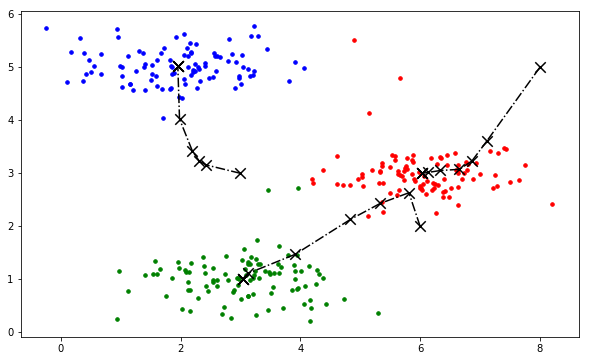

In [22]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt
import time

# cria a função para plotar os dados
def visualizarDados_centroids(X, centroids, idx, history):
    
    # define o tamanho da figura 
    plt.figure(figsize=(10,6))
    
    lcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'w']
    
    for i in range( centroids.shape[0] ):
        
        # plota os dados
        plt.scatter( X[idx==i,0], X[idx==i,1], marker='.', label = 'Dados', color=lcolors[i], s=50) 
   
    for j in range( len(history) ):
        
        for i in range( centroids.shape[0] ):
            # plota os dados
            plt.scatter( history[j]['centroids'][i,0], history[j]['centroids'][i,1], marker='x', color='black', s=110) 

            if j>0:
                plt.plot( [history[j-1]['centroids'][i,0], history[j]['centroids'][i,0]], [history[j-1]['centroids'][i,1], history[j]['centroids'][i,1]], color='k', linestyle='-.')  
        
    plt.show()
   
# chama a função que plota os dados   
visualizarDados_centroids(X, initial_centroids, idx, history)

# Parte 4: Usando o $k$-Médias para agrupar os pixels de uma imagem

Nesta parte do trabalho, você irá usar o $k$-médias para compactar uma imagem, isto é, representá-la usando um número menor de cores. 

Cada pixel da imagem será uma amostra da nossa base de dados. Cada pixel será representado por três valores que variam entre 0 e 255. O primeiro valor representa a intensidade da cor vermelha; o segundo é a intensidade da cor verde; e o terceiro é a intensidade da cor azul (RGB). 

Usando o método $k$-médias, iremos encontrar os agrupamentos das cores dos pixels. Depois, o valor de cada pixel será substituído pelo valor do centróide mais próximo. 



In [23]:
import imageio # função para ler dados em formato de imagem

A = imageio.imread('image1.png')

A = A / 255 # divide por 255 para que todos os valores fiquem entre 0 e 1

print('Dimensão inicial: ',  A.shape) # dimensões da matriz de pixels

# Muda a dimensão da matriz de imagens para Nx3 onde N = número de pixels.
# Cada linha contém os valores de vermelho, verde e azul do pixel.
# Esta será a base de dados que será agrupada pelo K-Médias.
X = np.reshape(np.ravel(A), (A.shape[0]*A.shape[1], 3)) 
print('\nNova dimensão: ',  X.shape)

print('\nValores dos 5 primeiros pixels:')
print(X[0:5,:])

Dimensão inicial:  (128, 128, 3)

Nova dimensão:  (16384, 3)

Valores dos 5 primeiros pixels:
[[ 0.61568627  0.64313725  0.60784314]
 [ 0.44313725  0.4745098   0.45490196]
 [ 0.41960784  0.45098039  0.45490196]
 [ 0.62745098  0.65882353  0.67843137]
 [ 0.29019608  0.32156863  0.34509804]]


Agora, vamos plotar os pixels da imagem.

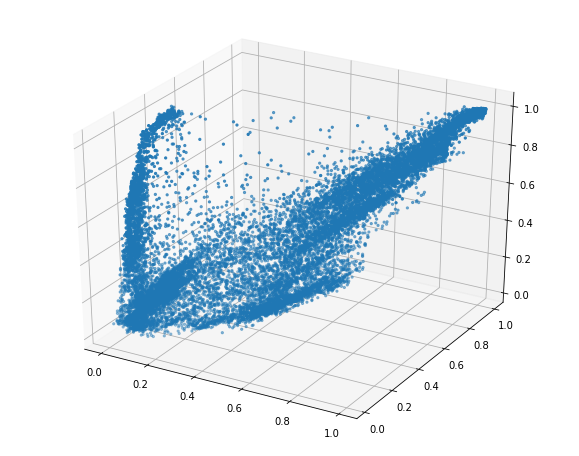

In [24]:
# rotina que plota os pixels
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], marker='.')
    
plt.show()

Quando usamos o $k$-médias, é importante inicializar os centróides aleatoriamente. Portanto, vamos usar uma função que gere essa versão inicial dos centróides. Depois disso, vamos executar o $k$-médias passando os centróides inicializados aleatoriamente como argumento.

In [25]:
# Função para inicializar centróides aleatoriamente
def kMeansInitCentroids(X, K):
    """
    Esta função inicializa K centróides para serem usados 
    pelo método K-Médias na base de dados X
    
    Parâmetros:
       X - matriz que representa a base de dados, onde cada linha é uma amostra 
       K - número de centróides desejados
    """
    
    # gera um vetor com os índices das amostras embaralhados
    idx_perm = np.random.permutation( range(X.shape[0]) )
    
    idx_perm = idx_perm[0:K] # pega apenas os primeiros K índices
    
    # inicializa os centroides usando os primeiros K índices 
    # embaralhados das amostras
    centroids = X[idx_perm,:]
    
    return centroids



# Parâmetros iniciais do k-médias <<< VOCÊ PODE ALTERAR ESSES VALORES>>>
K = 5 # quantidade de centróides
max_iters = 10 # quantidade de iterações

# inicializa os centroides aleatoriamente
initial_centroids = kMeansInitCentroids(X, K)

# executa o K-medias
centroids, idx = executa_kmedias(X, initial_centroids, max_iters, False)

K-Médias - Iteração 0/10
K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10


## Parte 5: Comprimindo a imagem

Nesta parte do exercício, você usará os agrupamentos do $k$-médias para comprimir uma imagem. Para isso, nós iremos primeiramente encontrar os centróides mais próximos de cada pixel. Depois, vamos substituir cada pixel pelo centróide mais próximo.  

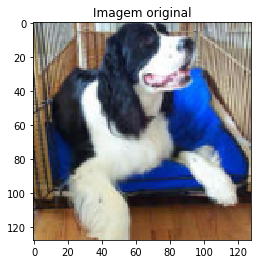

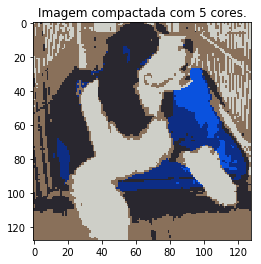

In [26]:
# encontra os índices dos centróides mais próximos
idx = findClosestCentroids(X, centroids);
idx = idx.astype(int)

# Agora vamos mapear amostra da base de dados (pixel) por seu centróide mais próximo.
X_recovered = centroids[idx,:]

# Vamos restaurar as dimensões originais da matriz de pixels
X_recovered = np.reshape( np.ravel(X_recovered), (A.shape[0], A.shape[1], 3) )

# Vamos plotar a imagem original
import matplotlib.pyplot as plt
plt.imshow(A); 
plt.title('Imagem original')
plt.show()

# Vamos plotar a imagem compactada
plt.imshow(X_recovered)
plt.title('Imagem compactada com %d cores.' %K);
plt.show()
